In [44]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
data = pd.read_csv('output-mck.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,contract_id,customer_id,customer_parent_company_id,shipping_date,market,contract_type,material_id,incoterms,country,region_id,...,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,price_per_unit,revenue
0,0,0,-1,24.11.2018,domestic,spot,430604,CPT,RU,50,...,Пр-во строительных материалов,0.0,0,0,1.357807e+07,0,292536.374275,63.334508,327471.105055,2.074022e+07
1,1,1,-1,01.11.2018,domestic,spot,430604,FCA,RU,74,...,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,320815.168845,2.031867e+07
2,1,1,-1,07.11.2018,domestic,spot,430604,FCA,RU,74,...,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,320815.168845,2.031867e+07
3,2,2,-1,24.11.2018,domestic,spot,430604,CPT,RU,32,...,Пр-во строительных материалов,0.0,0,0,1.038323e+07,0,292536.374275,31.667254,330932.166203,1.047971e+07
4,2,2,-1,29.11.2018,domestic,spot,430604,CPT,RU,32,...,Пр-во строительных материалов,0.0,0,0,1.863657e+07,0,292536.374275,63.334508,330932.166203,2.095943e+07


In [46]:
y_revenue = data['revenue']
price = data['price_per_unit']
all_costs = data['cost_ifso'] + data['cost_dir'] + data['cost_overhead'] + data['cost_commercial'] + data['custom_duties']
contract_id = data['contract_id']
customer_id = data['customer_id']
units = data['units']
data.head()

,contract_id,customer_id,customer_parent_company_id,shipping_date,market,contract_type,material_id,incoterms,country,region_id,...,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,price_per_unit,revenue
0,0,0,-1,24.11.2018,domestic,spot,430604,CPT,RU,50,...,Пр-во строительных материалов,0.0,0,0,1.357807e+07,0,292536.374275,63.334508,327471.105055,2.074022e+07
1,1,1,-1,01.11.2018,domestic,spot,430604,FCA,RU,74,...,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,320815.168845,2.031867e+07
2,1,1,-1,07.11.2018,domestic,spot,430604,FCA,RU,74,...,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,320815.168845,2.031867e+07
3,2,2,-1,24.11.2018,domestic,spot,430604,CPT,RU,32,...,Пр-во строительных материалов,0.0,0,0,1.038323e+07,0,292536.374275,31.667254,330932.166203,1.047971e+07
4,2,2,-1,29.11.2018,domestic,spot,430604,CPT,RU,32,...,Пр-во строительных материалов,0.0,0,0,1.863657e+07,0,292536.374275,63.334508,330932.166203,2.095943e+07


In [47]:
tmp = data[(data['CRM_client_industry'] == 'Пр-во строительных материалов') & (data['country'] == 'RU')]
len(tmp)

2150

In [129]:
df1 = tmp[['parity_value', 'region_id', 'cost_ifso', 'cost_commercial', 'contract_type', 'customer_id']].copy()

In [130]:
df1.head()

,parity_value,region_id,cost_ifso,cost_commercial,contract_type,customer_id
0,292536.374275,50,0.0,1.357807e+07,spot,0
1,295455.605000,74,0.0,0.000000e+00,spot,1
2,295455.605000,74,0.0,0.000000e+00,spot,1
3,292536.374275,32,0.0,1.038323e+07,spot,2
4,292536.374275,32,0.0,1.863657e+07,spot,2


In [131]:
df1.drop_duplicates(inplace=True)
ids = df1['customer_id']
df1.drop(columns=['customer_id'], inplace=True)
df1.head()

,parity_value,region_id,cost_ifso,cost_commercial,contract_type
0,292536.374275,50,0.0,1.357807e+07,spot
1,295455.605000,74,0.0,0.000000e+00,spot
3,292536.374275,32,0.0,1.038323e+07,spot
4,292536.374275,32,0.0,1.863657e+07,spot
16,295455.605000,66,0.0,0.000000e+00,spot


In [132]:
df = pd.get_dummies(df1)
df.head()

,parity_value,cost_ifso,cost_commercial,region_id_02,region_id_14,region_id_16,region_id_22,region_id_23,region_id_26,region_id_27,...,region_id_66,region_id_67,region_id_71,region_id_72,region_id_74,region_id_78,region_id_89,region_id_91,contract_type_longterm,contract_type_spot
0,292536.374275,0.0,1.357807e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,295455.605000,0.0,0.000000e+00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,292536.374275,0.0,1.038323e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,292536.374275,0.0,1.863657e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,295455.605000,0.0,0.000000e+00,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [134]:
df.head()

,parity_value,cost_ifso,cost_commercial,region_id_02,region_id_14,region_id_16,region_id_22,region_id_23,region_id_26,region_id_27,...,region_id_66,region_id_67,region_id_71,region_id_72,region_id_74,region_id_78,region_id_89,region_id_91,contract_type_longterm,contract_type_spot
0,-0.794389,-1.586418,0.455897,-0.266279,-0.027597,-0.147557,-0.087571,-0.297741,-0.214891,-0.061804,...,-0.325669,-0.150227,-0.198889,-0.152854,-0.139266,-0.170218,-0.055258,-0.142079,-0.332769,0.332769
1,-0.664249,-1.586418,-0.970620,-0.266279,-0.027597,-0.147557,-0.087571,-0.297741,-0.214891,-0.061804,...,-0.325669,-0.150227,-0.198889,-0.152854,7.180529,-0.170218,-0.055258,-0.142079,-0.332769,0.332769
2,-0.794389,-1.586418,0.120246,-0.266279,-0.027597,-0.147557,-0.087571,-0.297741,-0.214891,-0.061804,...,-0.325669,-0.150227,-0.198889,-0.152854,-0.139266,-0.170218,-0.055258,-0.142079,-0.332769,0.332769
3,-0.794389,-1.586418,0.987345,-0.266279,-0.027597,-0.147557,-0.087571,-0.297741,-0.214891,-0.061804,...,-0.325669,-0.150227,-0.198889,-0.152854,-0.139266,-0.170218,-0.055258,-0.142079,-0.332769,0.332769
4,-0.664249,-1.586418,-0.970620,-0.266279,-0.027597,-0.147557,-0.087571,-0.297741,-0.214891,-0.061804,...,3.070598,-0.150227,-0.198889,-0.152854,-0.139266,-0.170218,-0.055258,-0.142079,-0.332769,0.332769


In [135]:
from sklearn.cluster import AffinityPropagation

In [136]:
af = AffinityPropagation()
af.fit(df)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [137]:
len(af.cluster_centers_)

73

In [138]:
len(df)

1314

In [139]:
af.labels_

array([ 2, 16, 29, ..., 43,  2, 47], dtype=int64)

In [140]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np 

In [141]:
resids = []
for k in range(1, 100 + 1):
    cls = KMeans(init='random', n_clusters=k)
    cls.fit(df)
    resids.append(sum(np.min(cdist(df, cls.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (58). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (60) found smaller than n_clusters (61). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (63). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: 

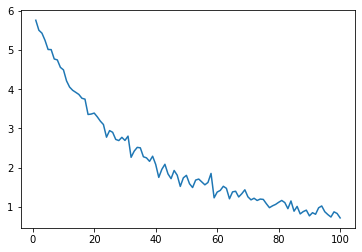

In [142]:
plt.plot(range(1, 100 + 1), resids)

In [143]:
from sklearn.cluster import SpectralClustering

In [152]:
scan = SpectralClustering(n_clusters=37)
scan.fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=37, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=None)

In [153]:
np.unique(scan.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [154]:
df1['labesls'] = scan.labels_

In [176]:
df1[df1['labesls'] == 0]

,parity_value,region_id,cost_ifso,cost_commercial,contract_type,labesls
1,295455.605000,74,0.0,0.000000e+00,spot,0
16,295455.605000,66,0.0,0.000000e+00,spot,0
23,293917.009998,59,0.0,0.000000e+00,spot,0
27,295455.605000,66,0.0,7.987100e+06,spot,0
46,293917.009998,52,0.0,1.171441e+07,spot,0
54,293917.009998,43,0.0,0.000000e+00,spot,0
56,293917.009998,59,0.0,0.000000e+00,spot,0
59,295455.605000,74,0.0,0.000000e+00,spot,0
65,295455.605000,66,0.0,7.987100e+06,spot,0
66,295455.605000,66,0.0,3.993549e+06,spot,0


In [158]:
len(tmp['region_id'].unique())

37

In [186]:
bel = data[data['country'] == 'BY'].copy()

In [187]:
from catboost import CatBoostRegressor

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
price = bel['price_per_unit']
bel.drop(columns=['revenue', 'contract_id', 'price_per_unit', 'shipping_date'], inplace=True)
bel.head()

,customer_id,customer_parent_company_id,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units
315,88,-1,export,spot,430604,CPT,BY,HM,processor,Строительство,Пр-во строительных материалов,0.0,0,0,8.482300e+06,0,291136.260677,60.695570
316,89,-1,export,spot,430604,FCA,BY,MA,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,291136.260677,47.500881
317,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,291136.260677,29.028316
318,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,291136.260677,31.667254
320,92,-1,export,spot,430604,CPT,BY,VI,processor,Строительство,Пр-во строительных материалов,0.0,0,0,2.581579e+06,0,291136.260677,18.472565


In [190]:
train, test, y_train, y_test = train_test_split(bel, price)

In [200]:
cat_features = ['customer_id', 'market', 'country', 'incoterms', 'CRM_client_type', 'CRM_client_industry', 'contract_type', 
               'material_id', 'region_id', 'CRM_client_segment']

In [248]:
model = CatBoostRegressor(num_trees=1, max_depth=3, learning_rate=1, cat_features=cat_features)


In [249]:
model.fit(train, y_train, eval_set=(test, y_test))

0:	learn: 5749.2321409	test: 5594.4231374	best: 5594.4231374 (0)	total: 11.7ms	remaining: 0us

bestTest = 5594.423137
bestIteration = 0



In [250]:
pic = model.plot_tree(0, pool=bel)

In [246]:
with open('tree_belarussia.svg', 'w') as f:
    f.write(pic._repr_svg_())

In [252]:
labels = model.calc_leaf_indexes(bel)

In [253]:
labels = [i[0] for i in labels]

In [254]:
labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 3,
 7,
 7,
 7,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 3,
 3,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [258]:
bel['labels'] = labels
bel['price'] = price

In [293]:
bel[bel['labels'] == 2]

,customer_id,customer_parent_company_id,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
315,88,-1,export,spot,430604,CPT,BY,HM,processor,Строительство,Пр-во строительных материалов,0.0,0,0,8.482300e+06,0,291136.260677,60.695570,2,340862.802914
316,89,-1,export,spot,430604,FCA,BY,MA,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,291136.260677,47.500881,2,334579.617607
317,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,291136.260677,29.028316,2,334579.617607
318,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,291136.260677,31.667254,2,334579.617607
320,92,-1,export,spot,430604,CPT,BY,VI,processor,Строительство,Пр-во строительных материалов,0.0,0,0,2.581579e+06,0,291136.260677,18.472565,2,340862.802914
321,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,0.0,0,0,1.696460e+07,0,291136.260677,121.391140,2,340862.802914
322,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,0.0,0,0,8.482300e+06,0,291136.260677,60.695570,2,340862.802914
323,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,0.0,0,0,8.482300e+06,0,291136.260677,60.695570,2,340862.802914
324,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,0.0,0,0,1.696460e+07,0,291136.260677,121.391140,2,340862.802914
325,94,-1,export,spot,430604,CPT,BY,HM,processor,Строительство,Пр-во строительных материалов,0.0,0,0,4.056735e+06,0,291136.260677,29.028316,2,342433.599241


In [294]:
bel[bel['labels'] == 0]

,customer_id,customer_parent_company_id,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
861,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,2.823040e+07,0,0,0.0,0,280963.28101,60.695570,0,289026.52413
862,103,-1,export,spot,430604,FCA,BY,HR,processor,Строительство,Пр-во строительных материалов,2.823040e+07,0,0,0.0,0,280963.28101,31.667254,0,289026.52413
874,101,-1,export,spot,430605,FCA,BY,VI,processor,Строительство,Пр-во строительных материалов,2.823041e+07,0,0,0.0,0,280963.28101,26.389378,0,289026.52413
878,90,-1,export,spot,430605,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,2.823040e+07,0,0,0.0,0,280963.28101,60.695570,0,289026.52413
879,103,-1,export,spot,430605,FCA,BY,HR,processor,Строительство,Пр-во строительных материалов,2.823040e+07,0,0,0.0,0,280963.28101,29.028316,0,289026.52413


In [295]:
bel[bel['labels'] == 1]

,customer_id,customer_parent_company_id,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
866,92,-1,export,spot,430604,CPT,BY,VI,processor,Строительство,Пр-во строительных материалов,2.895234e+07,0,0,2.581579e+06,0,280963.28101,18.472565,1,301592.894745
867,124,-1,export,spot,430604,CPT,BY,HM,processor,Строительство,Пр-во строительных материалов,2.887789e+07,0,0,8.482300e+06,0,280963.28101,60.695570,1,301592.894745
868,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.919205e+07,0,0,8.482300e+06,0,280963.28101,60.695570,1,304734.487398
869,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.919205e+07,0,0,1.696460e+07,0,280963.28101,121.391140,1,304734.487398
870,95,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.919205e+07,0,0,4.425565e+06,0,280963.28101,31.667254,1,304734.487398
871,95,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.919205e+07,0,0,4.056735e+06,0,280963.28101,29.028316,1,304734.487398
872,97,-1,export,spot,430604,CPT,BY,BR,processor,Строительство,Пр-во строительных материалов,2.867148e+07,0,0,7.457868e+06,0,280963.28101,31.667254,1,301592.894745
873,98,-1,export,spot,430604,CPT,BY,BR,processor,Товары народного потребления,Товары народного потребления,2.867148e+07,0,0,1.328629e+07,0,280963.28101,89.723886,1,301592.894745
875,102,-1,export,spot,430605,CPT,BY,HR,processor,Строительство,Пр-во строительных материалов,2.868656e+07,0,0,1.429425e+07,0,280963.28101,60.695570,1,301592.894745
876,102,-1,export,spot,430605,CPT,BY,HR,processor,Строительство,Пр-во строительных материалов,2.868656e+07,0,0,9.110619e+06,0,280963.28101,60.695570,1,301592.894745


In [296]:
bel[bel['labels'] == 3]

,customer_id,customer_parent_company_id,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
1116,89,-1,export,spot,430604,FCA,BY,MA,processor,Строительство,Пр-во строительных материалов,2.921965e+07,0,0,0.000000e+00,0,292366.005705,31.667254,3,298451.302091
1117,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,2.921965e+07,0,0,0.000000e+00,0,292366.005705,29.028316,3,298451.302091
1118,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,2.921965e+07,0,0,0.000000e+00,0,292366.005705,31.667254,3,298451.302091
1119,90,-1,export,spot,430604,FCA,BY,MI,processor,Строительство,Пр-во строительных материалов,2.921965e+07,0,0,0.000000e+00,0,292366.005705,60.695570,3,298451.302091
1123,133,-1,export,spot,430604,CPT,BY,HM,trader,Торговля,Торговля,2.955297e+07,0,0,8.482300e+06,0,292366.005705,60.695570,3,307876.080052
1124,124,-1,export,spot,430604,CPT,BY,HM,processor,Строительство,Пр-во строительных материалов,2.955297e+07,0,0,8.482300e+06,0,292366.005705,60.695570,3,307876.080052
1125,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.955297e+07,0,0,1.696460e+07,0,292366.005705,121.391140,3,307876.080052
1126,93,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.955297e+07,0,0,8.482300e+06,0,292366.005705,60.695570,3,307876.080052
1127,94,-1,export,spot,430604,CPT,BY,HM,processor,Строительство,Пр-во строительных материалов,2.955297e+07,0,0,8.482300e+06,0,292366.005705,60.695570,3,307876.080052
1128,95,-1,export,spot,430604,CPT,BY,MI,trader,Строительство,Пр-во строительных материалов,2.955297e+07,0,0,4.425565e+06,0,292366.005705,31.667254,3,307876.080052


In [301]:
', '.join([str(i) for i in bel[bel['labels'] == 7]['customer_id'].unique()])

'97, 141, 90, 103, 124, 93, 94, 95, 98, 101, 102, 133, 88, 89, 92, 146'

In [289]:
', '.join([str(i) for i in bel[bel['labels'] == 3]['customer_id'].unique()])

'89, 90, 133, 124, 93, 94, 95, 98, 101, 102, 92, 88, 146, 97, 103, 141'

In [290]:
', '.join([str(i) for i in bel[bel['labels'] == 2]['customer_id'].unique()])

'88, 89, 90, 92, 93, 94, 95, 97, 98, 101, 102, 103, 113, 141'

In [291]:
', '.join([str(i) for i in bel[bel['labels'] == 1]['customer_id'].unique()])

'92, 124, 93, 95, 97, 98, 102'

In [292]:
', '.join([str(i) for i in bel[bel['labels'] == 0]['customer_id'].unique()])

'90, 103, 101'

In [305]:
bel[bel['labels'] == 7]['customer_id'].value_counts()

95     41
90     40
93     24
141    14
97     12
102    11
98     10
94     10
92     10
103     8
88      8
101     7
89      6
146     2
124     2
133     1
Name: customer_id, dtype: int64

In [306]:
bel[bel['labels'] == 3]['customer_id'].value_counts()

90     11
95     10
93      9
124     8
98      7
92      7
102     6
97      4
101     3
89      3
94      2
88      2
146     2
141     2
103     1
133     1
Name: customer_id, dtype: int64

In [307]:
bel[bel['labels'] == 2]['customer_id'].value_counts()

93     18
90     17
95     15
92     13
102    12
98     10
94      8
88      8
97      7
89      6
103     5
141     4
113     4
101     4
Name: customer_id, dtype: int64

In [310]:
cl1 = ['95', '90', '93', '14', '97', '94', '103', '101', ]

In [311]:
cl2 = ['146', '124', '133']

In [312]:
cl3 = ['102', '98', '92', '88', '89', '141', '113']

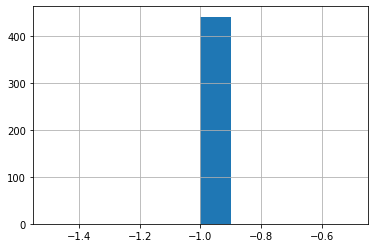

In [314]:
bel['customer_parent_company_id'].hist()

In [319]:
bel[bel['customer_id'].isin(cl1)].describe()

,customer_id,customer_parent_company_id,material_id,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
count,272.000000,272.0,272.000000,2.720000e+02,272.0,272.0,2.720000e+02,272.0,272.000000,272.000000,272.000000,272.000000
mean,94.213235,-1.0,430604.738971,2.197270e+07,0.0,0.0,4.277532e+06,0.0,313364.283490,46.123200,4.680147,318490.505231
std,3.588436,0.0,0.797753,1.347561e+07,0.0,0.0,4.257977e+06,0.0,21693.302984,22.096312,2.480308,12495.887528
min,90.000000,-1.0,430604.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,280963.281010,5.277876,0.000000,289026.524130
25%,90.000000,-1.0,430604.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,291136.260677,29.028316,2.000000,309446.876379
50%,94.000000,-1.0,430605.000000,2.991143e+07,0.0,0.0,4.043076e+06,0.0,319411.851196,39.584067,7.000000,315730.061686
75%,95.000000,-1.0,430605.000000,3.067505e+07,0.0,0.0,8.482300e+06,0.0,326778.414730,60.695570,7.000000,325154.839647
max,103.000000,-1.0,430607.000000,3.126410e+07,0.0,0.0,1.696460e+07,0.0,350364.235736,121.391140,7.000000,344004.395568


In [320]:
bel[bel['customer_id'].isin(cl2)].describe()

,customer_id,customer_parent_company_id,material_id,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
count,18.000000,18.0,18.000000,1.800000e+01,18.0,18.0,1.800000e+01,18.0,18.000000,18.000000,18.000000,18.000000
mean,129.888889,-1.0,430604.500000,2.940914e+07,0.0,0.0,6.126106e+06,0.0,297134.899720,43.835689,3.888889,309097.810528
std,9.310897,0.0,0.514496,6.163400e+05,0.0,0.0,2.322638e+06,0.0,11823.421051,16.619736,2.083235,4157.876201
min,124.000000,-1.0,430604.000000,2.887789e+07,0.0,0.0,2.212753e+06,0.0,280963.281010,15.833627,1.000000,301592.894745
25%,124.000000,-1.0,430604.000000,2.892750e+07,0.0,0.0,4.148943e+06,0.0,288780.513864,29.688051,3.000000,307876.080052
50%,124.000000,-1.0,430604.500000,2.895389e+07,0.0,0.0,5.900751e+06,0.0,299805.108613,42.223005,3.000000,307876.080052
75%,133.000000,-1.0,430605.000000,3.002421e+07,0.0,0.0,8.482300e+06,0.0,299805.108613,60.695570,6.000000,312588.469032
max,146.000000,-1.0,430605.000000,3.046645e+07,0.0,0.0,8.482300e+06,0.0,324103.348585,60.695570,7.000000,315730.061686


In [321]:
bel[bel['customer_id'].isin(cl3)].describe()

,customer_id,customer_parent_company_id,material_id,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,labels,price
count,151.000000,151.0,151.000000,1.510000e+02,151.0,151.0,1.510000e+02,151.0,151.000000,151.000000,151.000000,151.000000
mean,101.543046,-1.0,430604.960265,1.878772e+07,0.0,0.0,6.427782e+06,0.0,314496.126688,47.745551,4.079470,322866.262217
std,16.472092,0.0,0.999205,1.469584e+07,0.0,0.0,4.251043e+06,0.0,23112.951352,23.046759,2.390323,12711.790112
min,88.000000,-1.0,430604.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,280963.281010,5.277876,1.000000,298451.302091
25%,92.000000,-1.0,430604.000000,0.000000e+00,0.0,0.0,2.772776e+06,0.0,291136.260677,31.667254,2.000000,312588.469032
50%,98.000000,-1.0,430605.000000,2.905002e+07,0.0,0.0,8.482300e+06,0.0,319411.851196,60.695570,3.000000,322013.246993
75%,102.000000,-1.0,430605.000000,3.063987e+07,0.0,0.0,9.267698e+06,0.0,326778.414730,60.695570,7.000000,331438.024954
max,141.000000,-1.0,430607.000000,3.126410e+07,0.0,0.0,2.495520e+07,0.0,350364.235736,166.253083,7.000000,344004.395568
